In [1]:
# 1. Import required libraries and read the dataset.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/Google_playstore_appdata.csv')

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


The columns that need to be worked upon for model building are:

Reviews, Size, Installs, Price, Type, Content Rating, Rating_category

In [8]:
# 4. Check if there are any duplicate records in the dataset? if any drop them

df.duplicated().sum()

483

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
df.query("Category == '1.9'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df.drop(10472, inplace=True)

In [13]:
# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
def categorize_rating(rating):
    return 'High' if rating > 3.5 else 'Low'

In [16]:
df['Rating_category'] = df['Rating'].apply(categorize_rating)

In [17]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High


[Text(0, 0, '8007'), Text(0, 0, '879')]

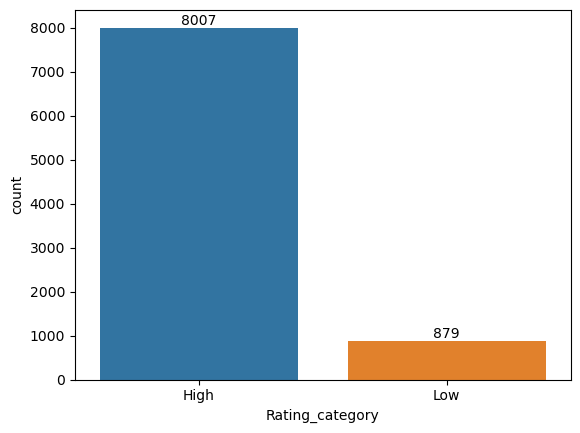

In [18]:
# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

ax = sns.countplot(data=df, x= 'Rating_category')
plt.bar_label(ax.containers[0])

In [19]:
# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

df['Reviews'] = df['Reviews'].astype(float)

<Axes: xlabel='Reviews'>

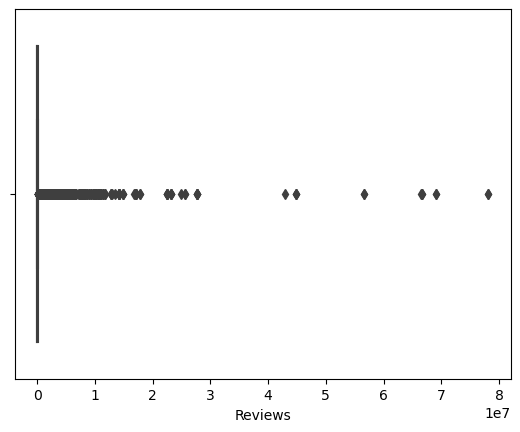

In [20]:
sns.boxplot(data= df, x= 'Reviews')

In [21]:
df['Reviews'] = np.log(df['Reviews'])

In [22]:
df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

In [23]:
df.drop(df[df['Size'] == "Varies with device"].index, inplace= True)

In [24]:
# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

df['Size'] = df['Size'].replace(['M', 'K', 'k'], ['e6', 'e3', 'e3'], regex=True).map(pd.eval).astype(float)

In [25]:
# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7418, dtype: object

In [26]:
df['Installs'] = (df['Installs'].str.replace('+', '').str.replace(',', '')).astype(float)

In [27]:
# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type. 

df.Price

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7418, dtype: object

In [28]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [29]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High


In [30]:
# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

df.drop(['Rating', 'Genres', 'Last Updated', 'Current Ver'], axis= 1, inplace= True)

In [31]:
df.drop(['Android Ver'], axis=1, inplace=True)

In [32]:
df.describe(include='object')

,App,Category,Type,Content Rating,Rating_category
count,7418,7418,7418,7418,7418
unique,7023,33,2,6,2
top,ROBLOX,FAMILY,Free,Everyone,High
freq,9,1590,6873,5952,6594


In [33]:
# 13. Encode the categorical columns.

df.drop(['App', 'Category'], axis=1, inplace=True)

In [34]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [35]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [36]:
df.Rating_category.unique()

array(['High', 'Low'], dtype=object)

In [37]:
df['Type'].replace(['Free', 'Paid'], [0, 1], inplace=True)

In [38]:
df['Rating_category'].replace(['Low', 'High'], [0, 1], inplace=True)

In [39]:
dummies = pd.get_dummies(data = df, columns = ['Content Rating'], drop_first=True)

In [40]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7418 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Reviews                      7418 non-null   float64
 1   Size                         7418 non-null   float64
 2   Installs                     7418 non-null   float64
 3   Type                         7418 non-null   int64  
 4   Price                        7418 non-null   float64
 5   Rating_category              7418 non-null   int64  
 6   Content Rating_Everyone      7418 non-null   bool   
 7   Content Rating_Everyone 10+  7418 non-null   bool   
 8   Content Rating_Mature 17+    7418 non-null   bool   
 9   Content Rating_Teen          7418 non-null   bool   
 10  Content Rating_Unrated       7418 non-null   bool   
dtypes: bool(5), float64(4), int64(2)
memory usage: 441.9 KB


In [41]:
def outlier(col):
    
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    return lw, uw

In [42]:
for i in ['Reviews', 'Size', 'Installs']:
    
    lw, uw = outlier(dummies[i])
    
    dummies[i] = np.where(dummies[i] < lw, lw, dummies[i])
    dummies[i] = np.where(dummies[i] > uw, uw, dummies[i])

<Axes: xlabel='Installs'>

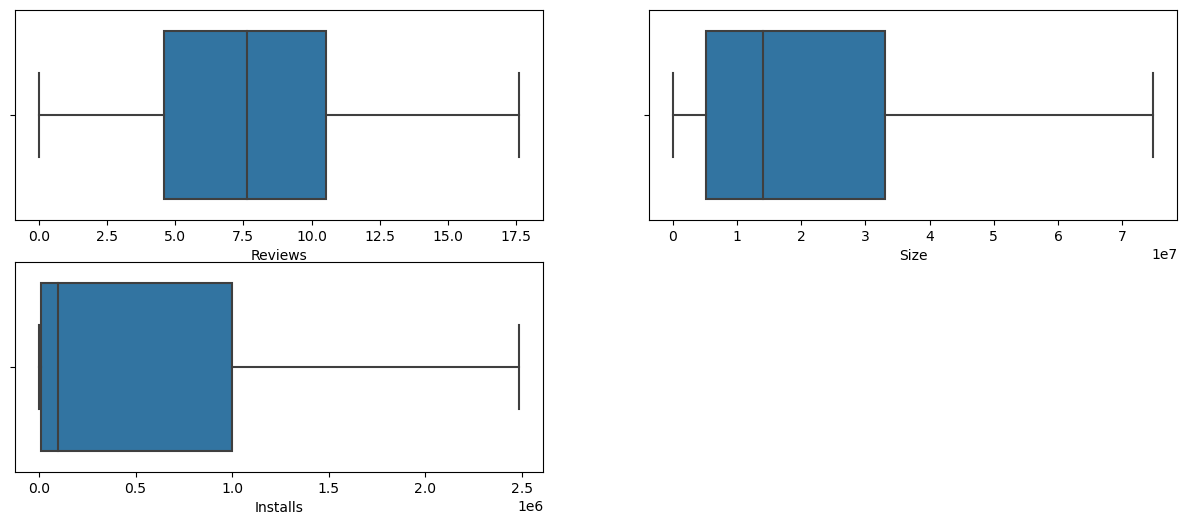

In [43]:
plt.figure(figsize = (15, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x = dummies['Reviews'])

plt.subplot(2, 2, 2)
sns.boxplot(x = dummies['Size'])

plt.subplot(2, 2, 3)
sns.boxplot(x = dummies['Installs'])

In [44]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7418 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Reviews                      7418 non-null   float64
 1   Size                         7418 non-null   float64
 2   Installs                     7418 non-null   float64
 3   Type                         7418 non-null   int64  
 4   Price                        7418 non-null   float64
 5   Rating_category              7418 non-null   int64  
 6   Content Rating_Everyone      7418 non-null   bool   
 7   Content Rating_Everyone 10+  7418 non-null   bool   
 8   Content Rating_Mature 17+    7418 non-null   bool   
 9   Content Rating_Teen          7418 non-null   bool   
 10  Content Rating_Unrated       7418 non-null   bool   
dtypes: bool(5), float64(4), int64(2)
memory usage: 441.9 KB


In [45]:
# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

X = dummies.drop(['Rating_category'], axis=1)
y = dummies['Rating_category']

In [46]:
# 15. Split the dataset into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# 16. Standardize the data, so that the values are within a particular range.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = pd.DataFrame(scaler.fit_transform(dummies), columns=dummies.columns)

df1

,Reviews,Size,Installs,Type,Price,Rating_category,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.287682,0.253756,0.004024,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.390140,0.186948,0.201207,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.645836,0.116132,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.697021,0.333926,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.390140,0.037299,0.040241,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7413,0.214769,0.008157,0.000402,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7414,0.110439,0.034627,0.000201,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7415,0.206449,0.708050,0.002012,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7416,0.078678,0.047988,0.000040,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
